In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


([<matplotlib.patches.Wedge at 0x7ac29514e8c0>,
 [Text(-0.04550175175760134, 1.0990585018946852, '0'),
  Text(0.04550175175760096, -1.0990585018946852, '1')],
 [Text(-0.024819137322328003, 0.5994864555789191, '51%'),
  Text(0.024819137322327794, -0.5994864555789191, '49%')])

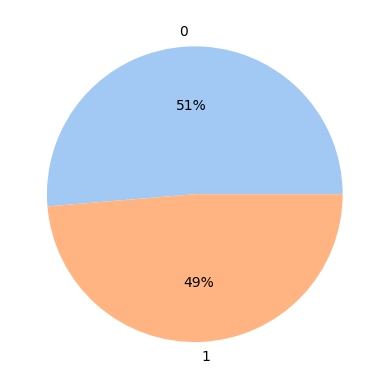

In [8]:
colors = sns.color_palette('pastel')[0:2]
plt.pie(df["target"].value_counts(),labels = df["target"].unique(),colors = colors,  autopct='%.0f%%')

In [9]:
cor=df.corr()
cor["target"].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

In [10]:
X=df.drop("target",axis=1)
y=df["target"]

# Univariate Selection For categorical Variable

In [11]:
bestfeature=SelectKBest(score_func=chi2)

In [12]:
fit=bestfeature.fit(X,y)

In [13]:
scores=pd.DataFrame(fit.scores_)

In [14]:
featureScore=pd.concat([pd.DataFrame(X.columns),scores],axis=1)
featureScore.columns=["label","score"]

In [15]:
featureScore.sort_values(by="score",ascending=False)

,label,score
7,thalach,650.008493
9,oldpeak,253.653461
2,cp,217.823922
11,ca,210.625919
8,exang,130.470927
4,chol,110.723364
0,age,81.425368
3,trestbps,45.974069
10,slope,33.673948
1,sex,24.373650


# Droping the features which are not correlated

In [16]:
df.drop(["restecg","fbs"],axis=1,inplace=True)

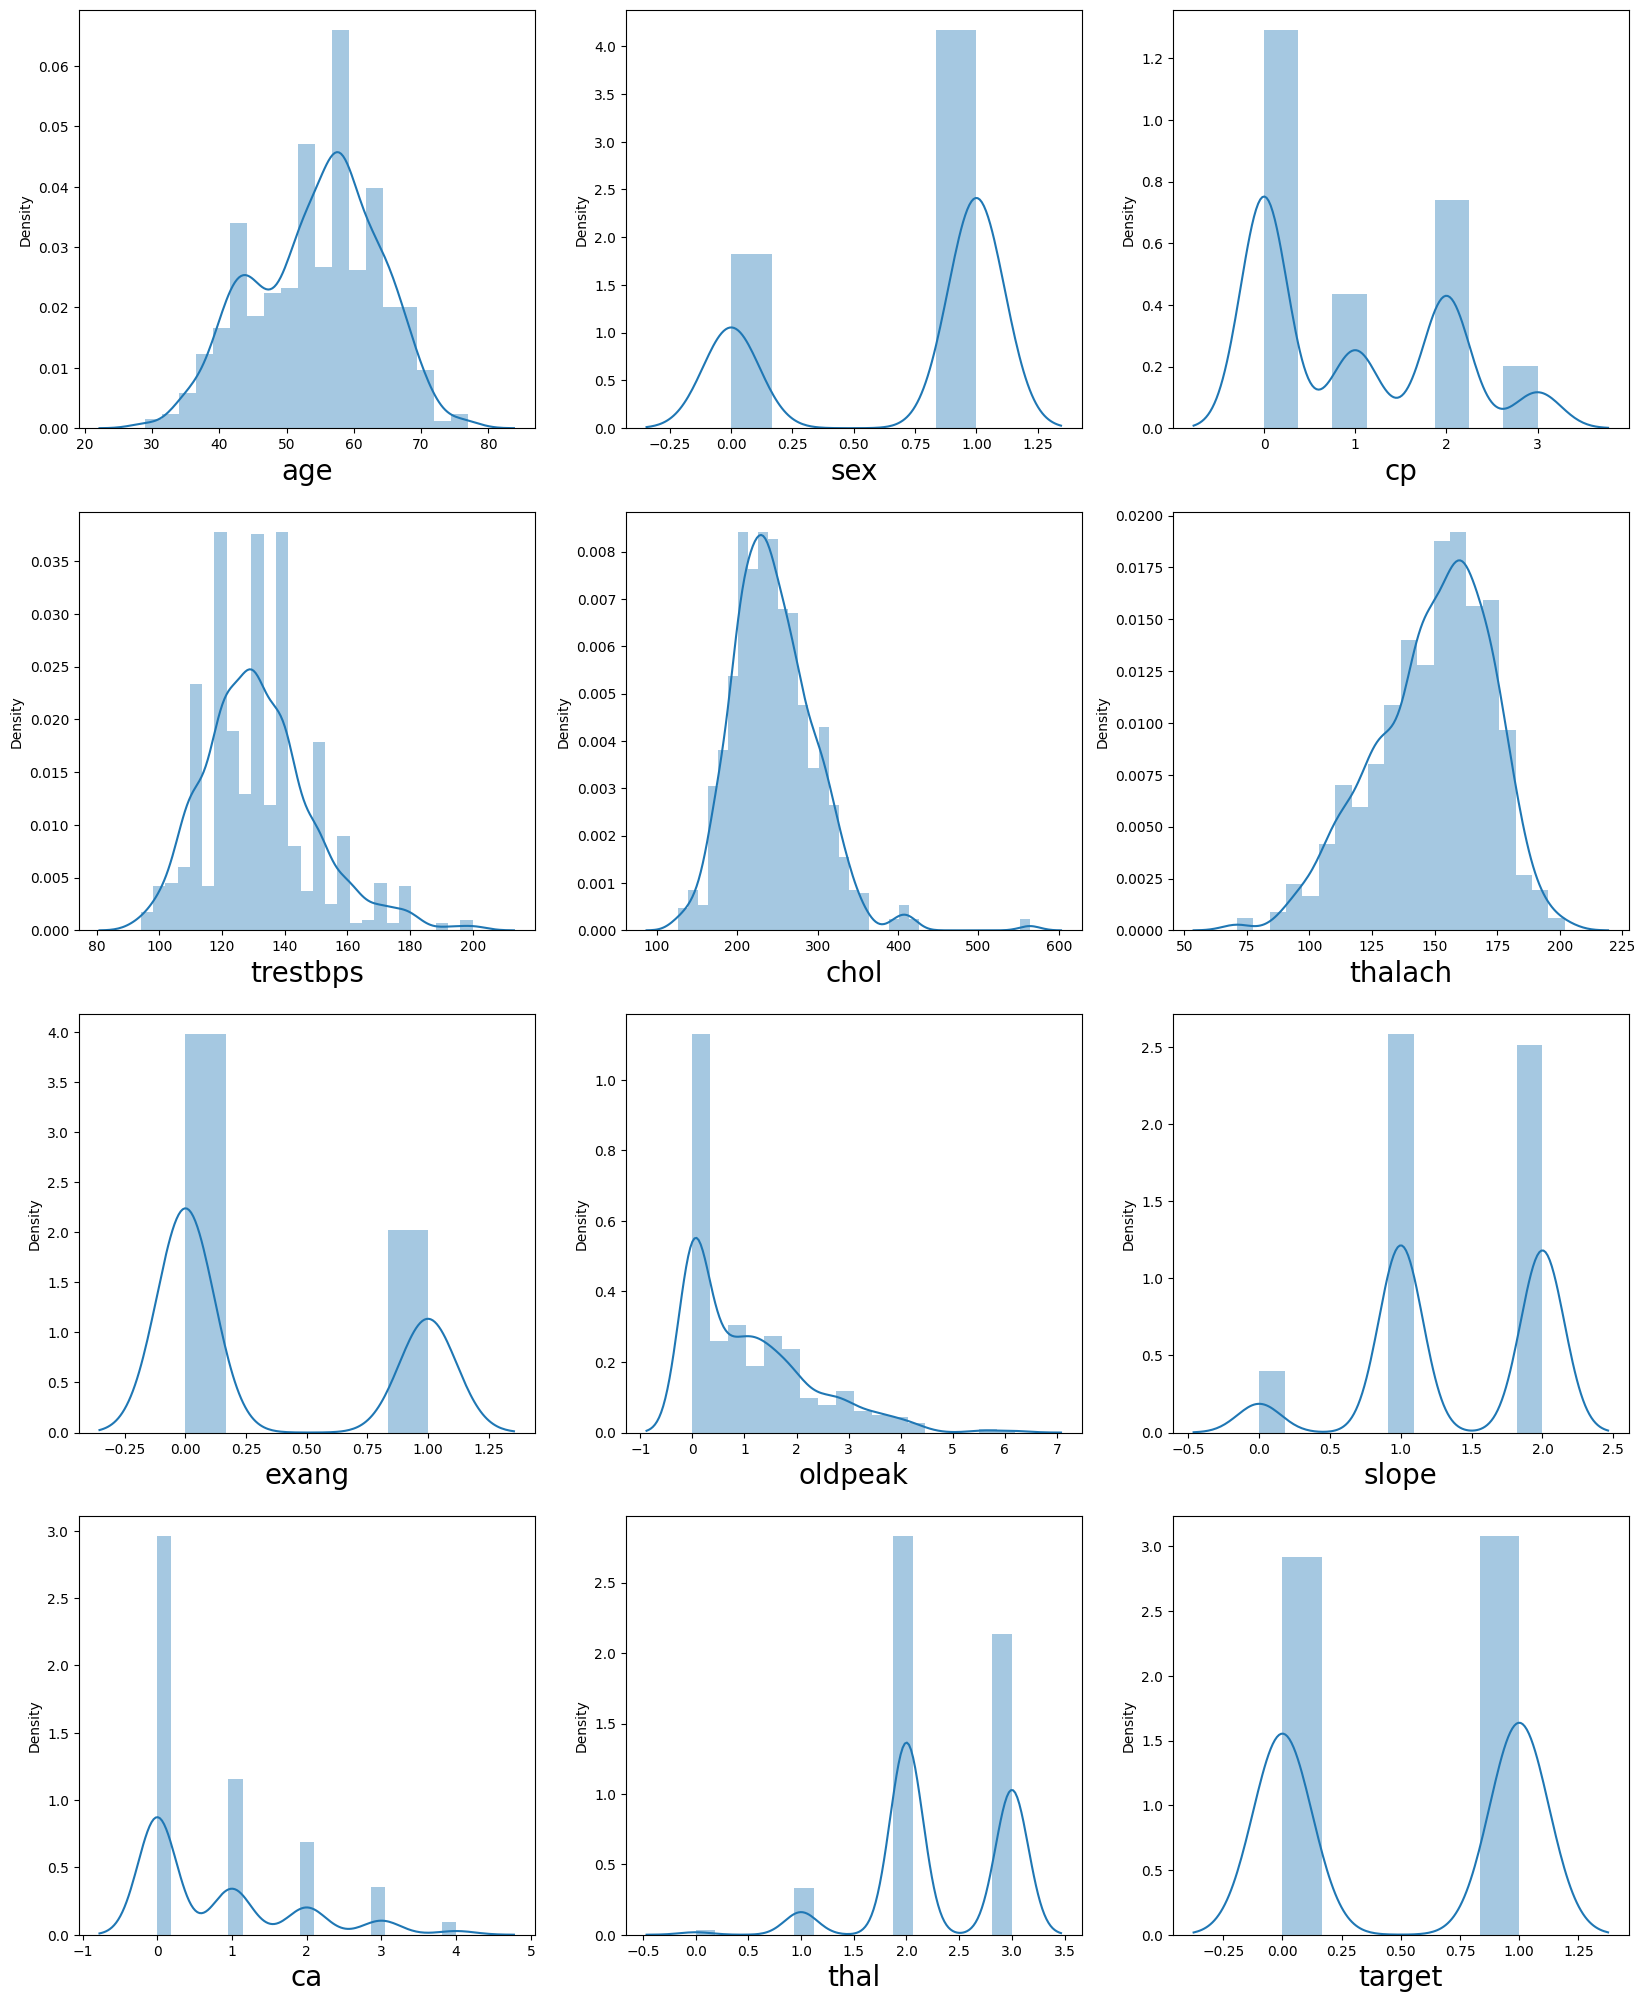

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12 :     # as there are 9 columns in the data
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

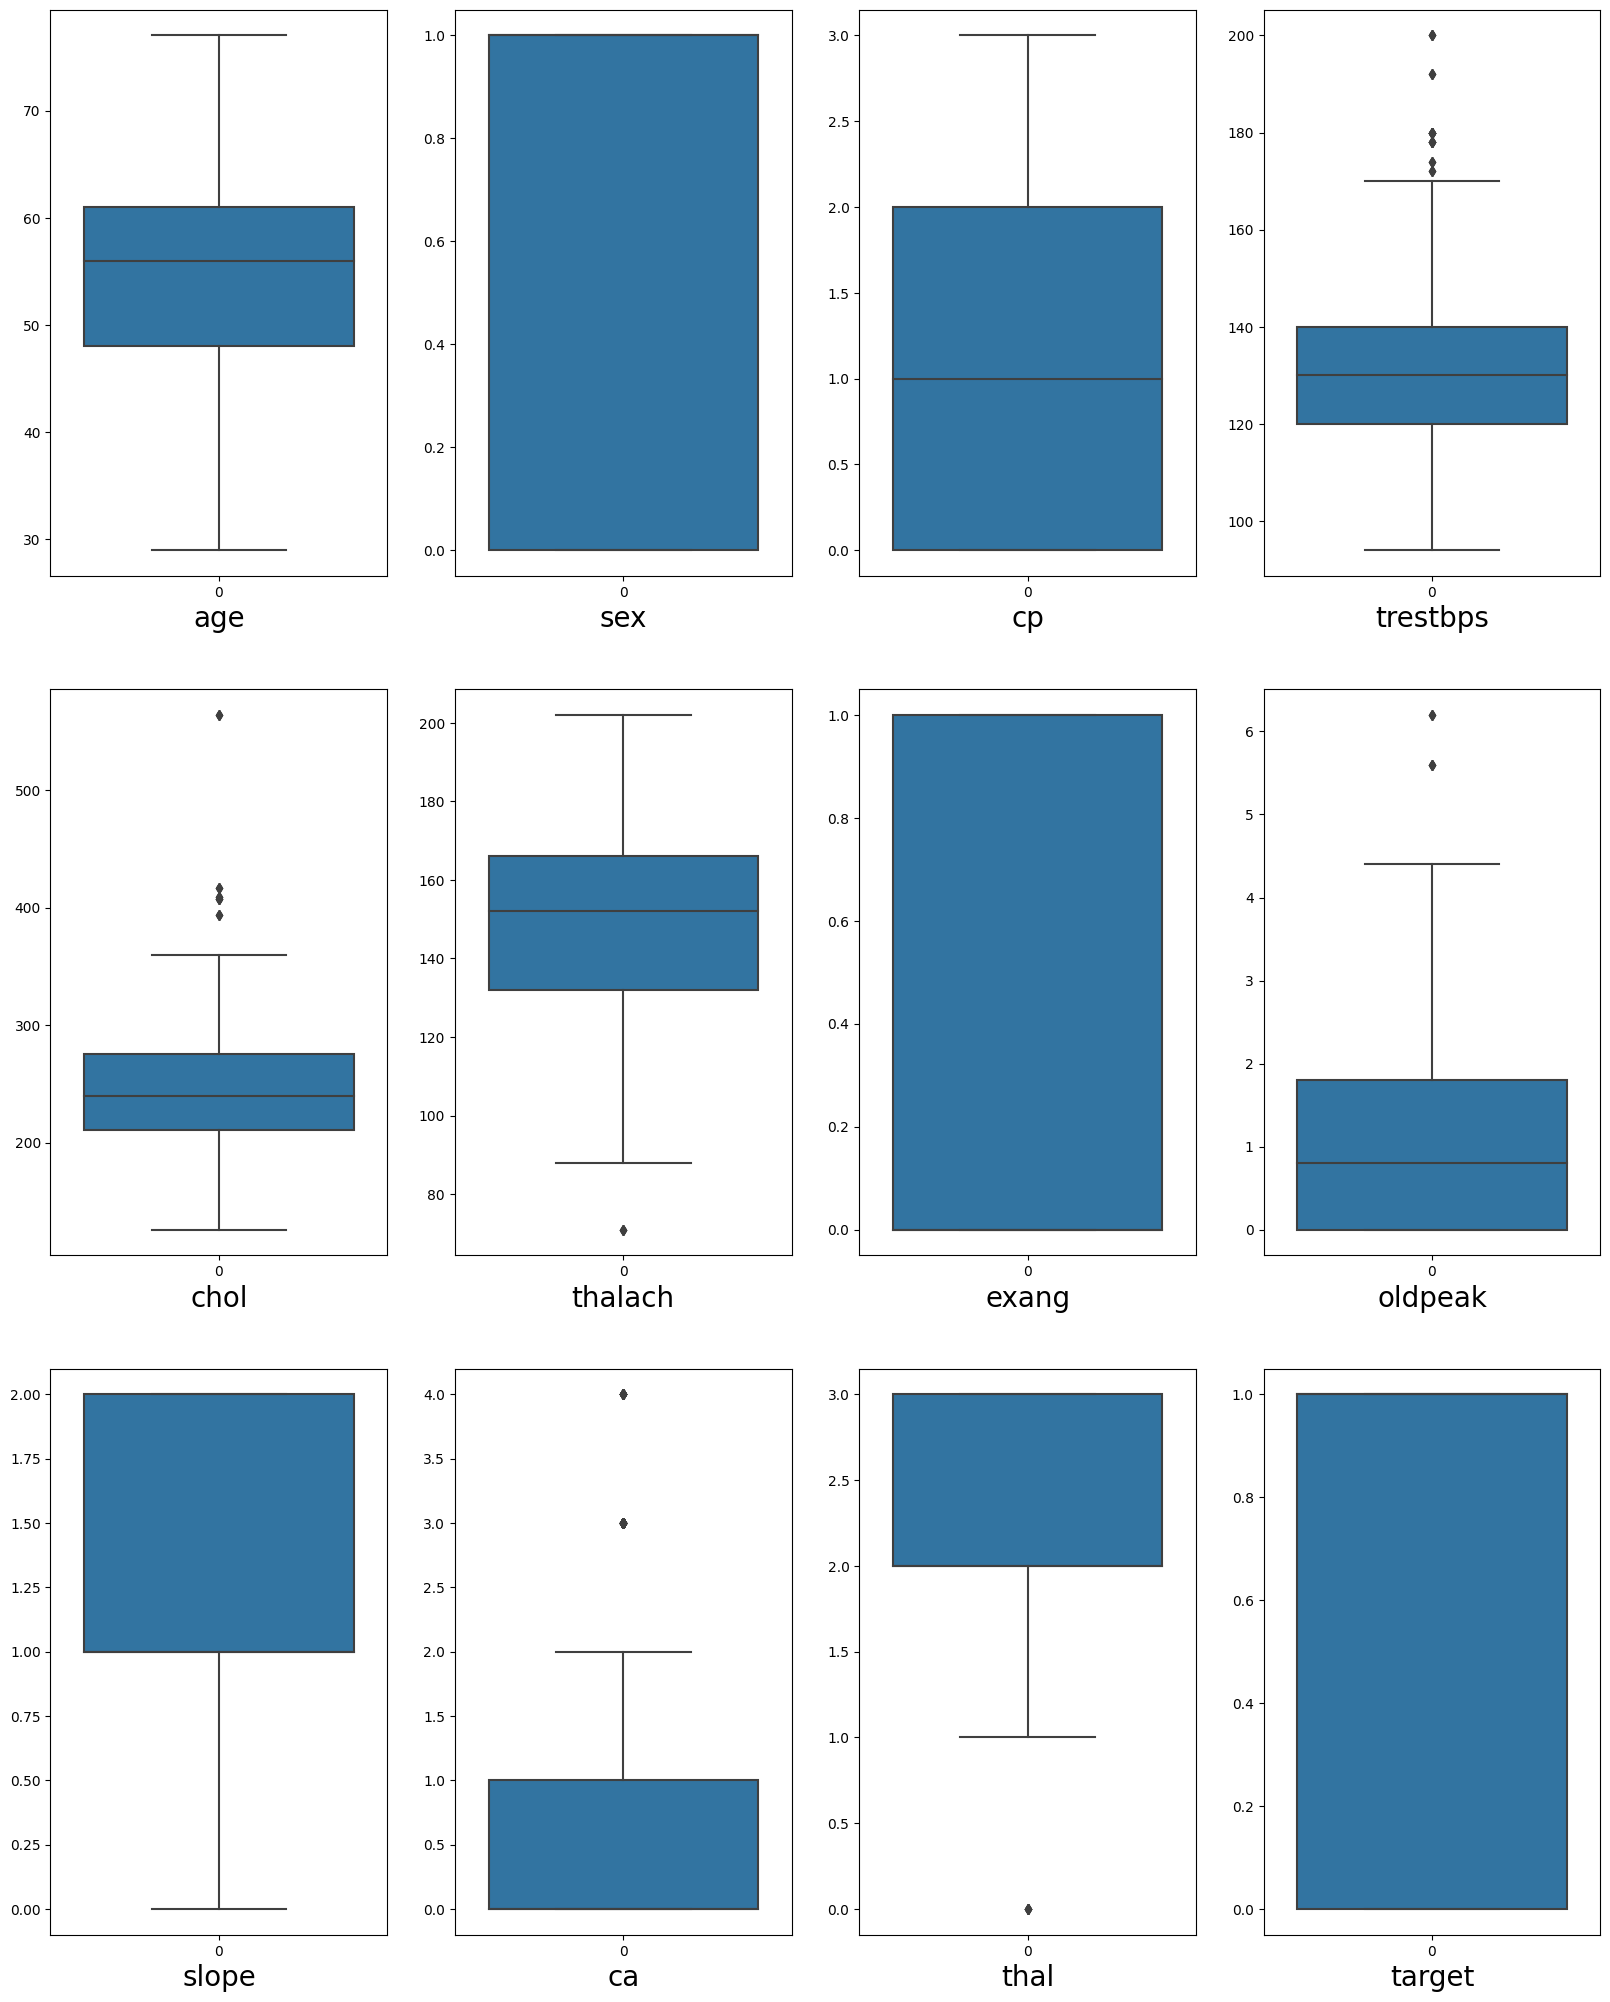

In [18]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=12 :     # as there are 9 columns in the data
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

In [19]:
outlier_cols=[]
for outlier_detect in df:
    
    Q1 = df[outlier_detect].quantile(0.25)
    Q3 = df[outlier_detect].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower = Q1- 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    if df[(df[outlier_detect] > upper)].any(axis=None):
        print(outlier_detect,":yes")
        outlier_cols.append(outlier_detect)
    else:
        print(outlier_detect, ":no")

age :no
sex :no
cp :no
trestbps :yes
chol :yes
thalach :no
exang :no
oldpeak :yes
slope :no
ca :yes
thal :no
target :no


In [20]:
outlier_cols

['trestbps', 'chol', 'oldpeak', 'ca']

In [21]:
for col in outlier_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    df = df[(df[col]>lower_limit)&(df[col]<upper_limit)]

In [22]:
for outlier_detect in df:
    
    Q1 = df[outlier_detect].quantile(0.25)
    Q3 = df[outlier_detect].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower = Q1- 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    if df[(df[outlier_detect] > upper)].any(axis=None):
        print(outlier_detect,":yes")
        outlier_cols.append(outlier_detect)
    else:
        print(outlier_detect, ":no")

age :no
sex :no
cp :no
trestbps :no
chol :yes
thalach :no
exang :no
oldpeak :no
slope :no
ca :no
thal :no
target :no


In [23]:
df.head()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,168,0,1.0,2,2,3,0
1,53,1,0,140,203,155,1,3.1,0,0,3,0
2,70,1,0,145,174,125,1,2.6,0,0,3,0
3,61,1,0,148,203,161,0,0.0,2,1,3,0
5,58,0,0,100,248,122,0,1.0,1,0,2,1


In [24]:
for i in df.columns:
    print(i,df[i].unique())
    print('\n')

age [52 53 70 61 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64 65
 41 66 48 29 37 47 62 68 76 40 39 69 49 35 38 74]


sex [1 0]


cp [0 1 2 3]


trestbps [125 140 145 148 100 160 120 122 112 132 118 128 124 106 104 135 130 136
 129 150 138 146 117 152 154 134 144 108 123 110 142 126  94 115 102 105
 155 164 156 101]


chol [212 203 174 248 289 249 286 149 341 210 204 308 266 244 211 185 223 208
 252 209 307 233 319 256 169 131 269 196 231 213 271 263 229 360 258 330
 342 226 278 230 283 241 193 245 232 299 197 315 215 207 177 257 255 201
 220 268 267 236 303 282 126 309 186 275 281 206 335 218 254 295 260 240
 302 192 235 274 234 182 167 172 298 321 300 199 157 222 184 354 160 247
 239 246 293 180 250 221 318 200 243 311 261 242 205 306 288 219 353 198
 183 237 224 265 228 313 340 259 270 325 227 294 216 264 276 214 273 253
 176 175 284 305 168 290 277 304 262 195 166 178 141 188]


thalach [168 155 125 161 122 145 144 116 136 192 156 142 109 162 165 148 172 173
 146 179 152

In [25]:
X=df.drop("target",axis=1).values
y=df["target"]

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scalevalue=MinMaxScaler()
scalevalue.fit_transform(X)

array([[0.4893617 , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.5106383 , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.87234043, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.38297872, 1.        , 0.        , ..., 0.5       , 0.5       ,
        0.66666667],
       [0.44680851, 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.53191489, 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [30]:
X_train

array([[66.,  1.,  0., ...,  2.,  0.,  1.],
       [57.,  1.,  0., ...,  1.,  0.,  1.],
       [65.,  1.,  0., ...,  2.,  2.,  1.],
       ...,
       [64.,  1.,  2., ...,  1.,  0.,  3.],
       [44.,  1.,  2., ...,  2.,  0.,  2.],
       [44.,  1.,  1., ...,  2.,  0.,  3.]])

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(873, 11) (698, 11) (175, 11)


In [32]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [33]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [34]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8796561604584527


In [35]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8285714285714286


In [36]:
'''['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal']'''

input_data = (58,0,0,100,248,122,0,1.0,0,2,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [37]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.83


<AxesSubplot: >

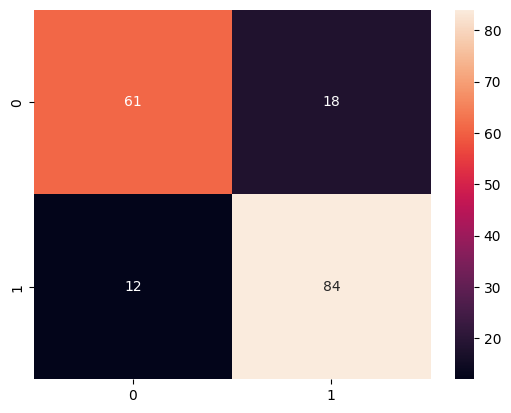

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(pd.DataFrame(cm),annot=True)

In [39]:
from sklearn.metrics import roc_curve

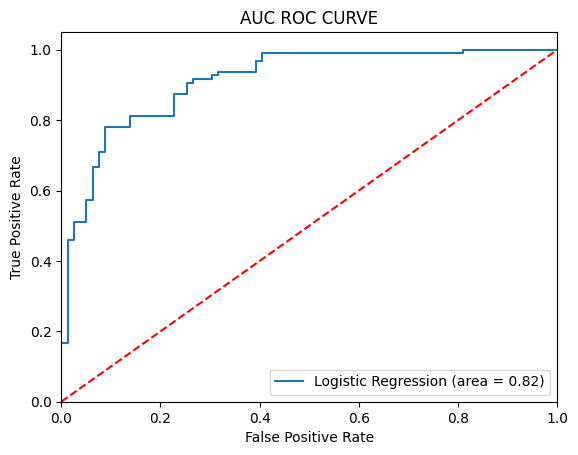

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [41]:
y_predd=model.predict(X_test)

y_predd

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [42]:
y_predd=pd.DataFrame(y_pred,columns=["Predicted"])
y_predd["Actual"]=np.array(Y_test)

y_predd

,Predicted,Actual
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
170,1,1
171,1,1
172,1,1
173,1,1
